In [80]:
# Set up development extensions to reflect live changes in the workspace
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mpld3
from scripts import updated_plot_data as uplt
from scripts import updated_parse_data as upl
from scripts import transform_data as tfrom
from scripts import plot_heap_allocation as pha # can be combined with other modules in the future. 
from matplotlib import pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]
#mpld3.enable_notebook()

# BEGIN DEMO #
# GC_LOG1="-Xmx2048m -Xlog:gc*,gc+phases=debug:file=./demo/demo_g1.log"
# GC_LOG2="-Xmx2048m -XX:MaxGCPauseMillis=40 -XX:InitiatingHeapOccupancyPercent=20 -Xlog:gc*,gc+phases=debug:file=./demo/demo_g1_limited.log"
# GC_LOG3="-XX:+UnlockExperimentalVMOptions -XX:+UseShenandoahGC   -Xmx2048m -Xlog:gc*,gc+phases=debug:file=./demo/demo_g1_shenandoah.log"

path1 = "datasets/demo_data/demo_g1.log"
path2 = "datasets/demo_data/demo_g1_limited.log"
path3 = "datasets/demo_data/demo_shenandoah.log"
# # Access a pandas dataframe with timestamps, pauses, and memory changes
d1     = upl.getPauses(logfile = path1)
d2     = upl.getPauses(logfile = path2)
d3     = upl.getPauses(logfile = path3)

# Set the same time range
maxtime_seconds = 10000
tfrom.setMaxTime(d1, maxtime_seconds)
tfrom.setMaxTime(d2, maxtime_seconds)
tfrom.setMaxTime(d3, maxtime_seconds)



# Parse metadata related to garbage collection from the logs
print("Beginning output graphs and charts")
m1 = upl.getGCMetadata(path1)
m2 = upl.getGCMetadata(path2)
m3 = upl.getGCMetadata(path3)

# Easily access the pandas dataframe and remove the timestamps, and pauses. Can be done manually as well using 
x1, y1 = tfrom.get_combined_xy_pauses(d1)
x2, y2 = tfrom.get_combined_xy_pauses(d2)
x3, y3 = tfrom.get_combined_xy_pauses(d3)

# Create a set of labels & colors to be plotted when comparing the different runtimes against each other
labels = ["G1", "G1 limited heap", "Shenandoah"]
colors = ["k", "b", "r"]

# Create individual labels and color, for single analysis test purposes  
color  = "black"
label  = "First run"

# group timestamp_seconds and pause_miliseconds 
times_seconds  = [x1, x2, x3]
pauses_miliseconds = [y1, y2, y3]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Beginning output graphs and charts


### Compare pauses line graph

### Compare percentiles

In [83]:
#uplt.print_percentiles(list(y1))
#print("\n\n")
#uplt.print_percentiles(list(y1), percentiles = [50, 75, 99.9999])
#print("\n\n")
uplt.compare_pauses_percentiles(list(pauses_miliseconds), labels=labels)
print("\n")

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
G1         | 15.846 ms | 36.134 ms | 123.3 ms  | 148.402 m | 194.724 m | 272.724 m | 309.358 m | 
G1 limited | 113.443 m | 177.144 m | 204.083 m | 216.999 m | 235.731 m | 275.66 ms | 285.146 m | 
Shenandoah | 0.177 ms  | 0.526 ms  | 1.303 ms  | 1.428 ms  | 1.735 ms  | 274.894 m | 308.648 m | 




### Compare trends

In [84]:
#uplt.print_trends(y1, timestamps=x1)
#print("\n\n") 
uplt.compare_trends(list(pauses_miliseconds), labels=labels, lists_of_timestamps = times_seconds)
print("\n")

 Trends (ms)  |  Total Pauses |  Max pause    |  Sum pauses   |  Mean pauses  |  Throughput   |
-----------------------------------------------------------------------------------------------
G1            | 902           | 313.428       | 34786.211     | 38.5656       | 93.2%         | 
G1 limited he | 1641          | 286.197       | 191743.526    | 116.8455      | 63.43%        | 
Shenandoah    | 1652          | 312.899       | 2610.13       | 1.58          | 99.5%         | 




### Plot heatmaps

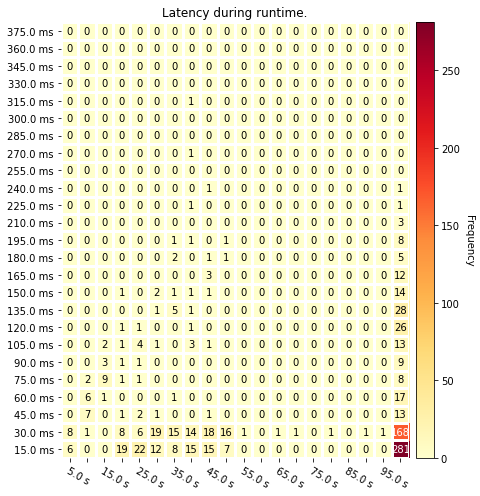

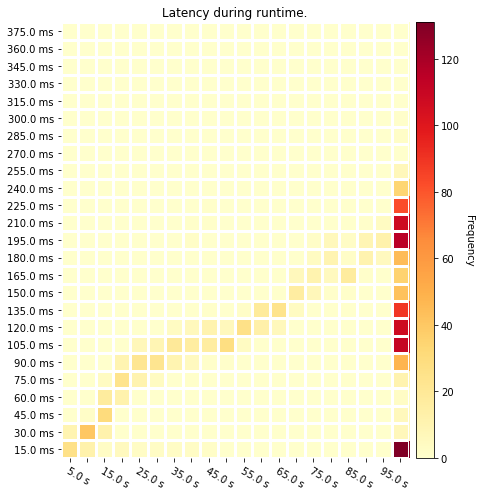

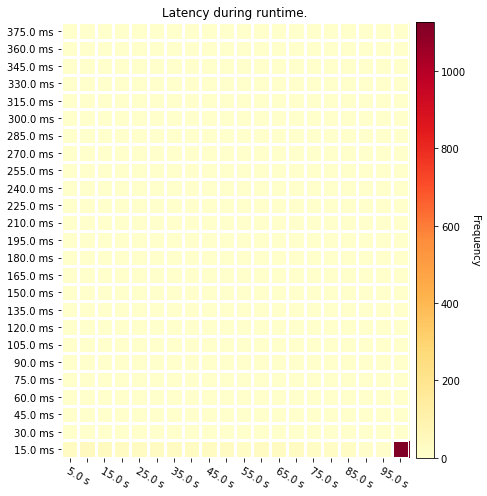

In [85]:
hm, dimensions = tfrom.get_heatmap_data(d1, x_bucket_count = 20, y_bucket_count = 25, x_bucket_duration = 5, y_bucket_duration = 15)
uplt.plot_heatmap(hm, dimensions, True)
hm, dimensions = tfrom.get_heatmap_data(d2, x_bucket_count = 20, y_bucket_count = 25, x_bucket_duration = 5, y_bucket_duration = 15)
uplt.plot_heatmap(hm, dimensions, False)
hm, dimensions = tfrom.get_heatmap_data(d3, x_bucket_count = 20, y_bucket_count = 25, x_bucket_duration = 5, y_bucket_duration = 15)
uplt.plot_heatmap(hm, dimensions, False)

### Compare pauses line type 2*
#### The line returns to zero after a pause, and each bar's height corresponds to the pause duration. Prefered over line pauses for smaller datasets

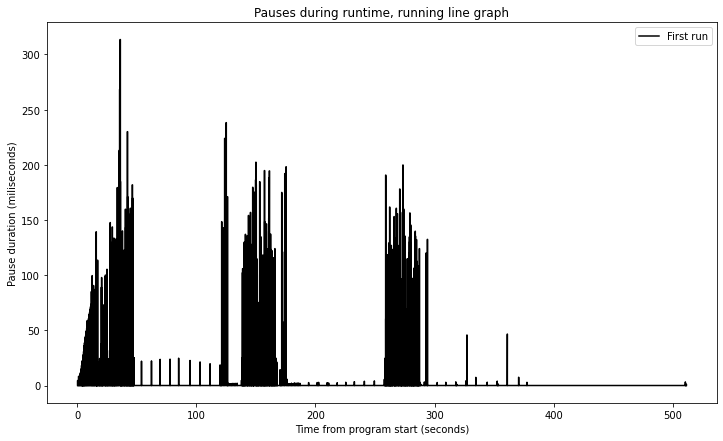

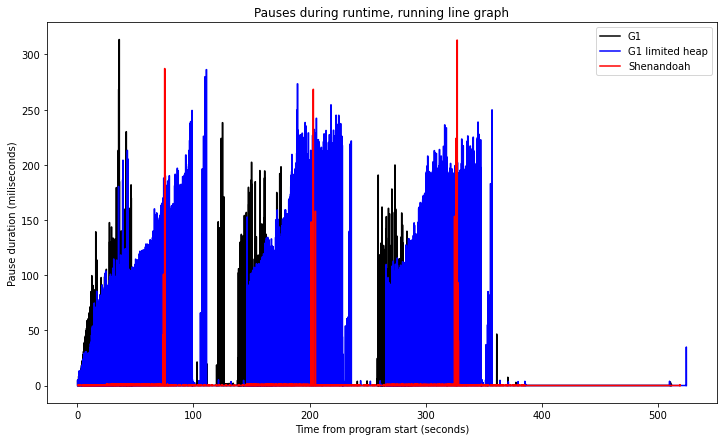

In [86]:
f, axs = plt.subplots()
_ = uplt.plot_paused_and_running_line(x1, y1, axs, color, label)
uplt.compare_paused_running_line(times_seconds, pauses_miliseconds, None, colors, labels)
print("\n")

### Sum of pauses over duration, bar graph

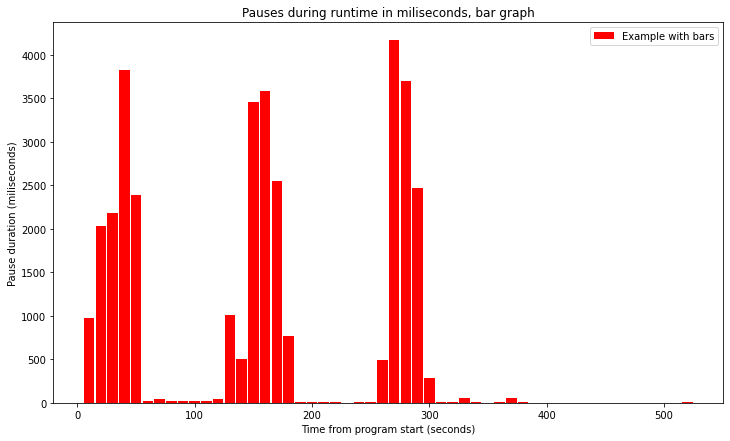

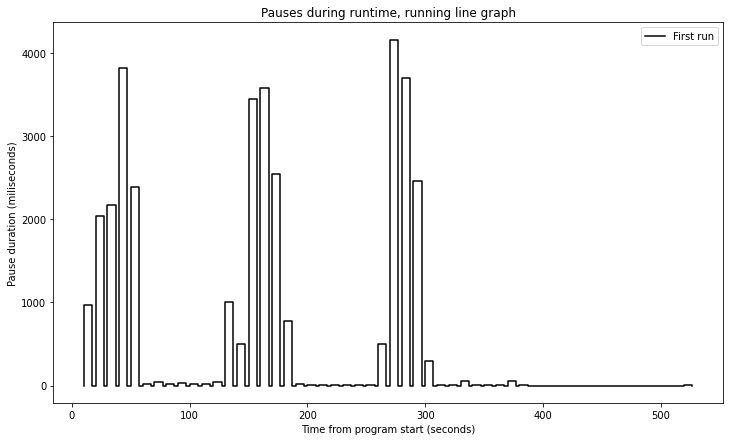

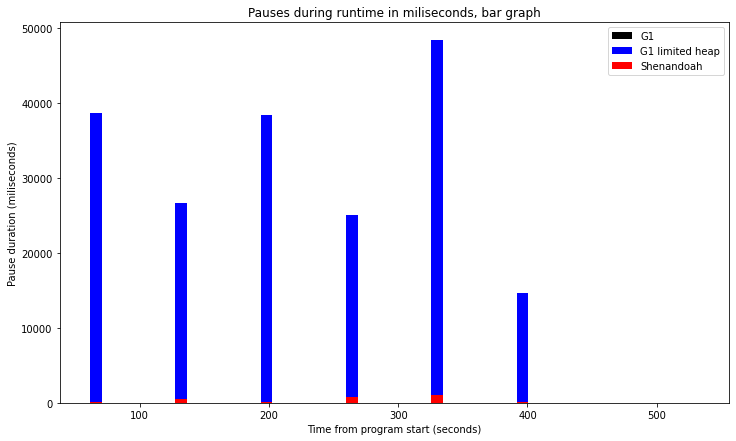

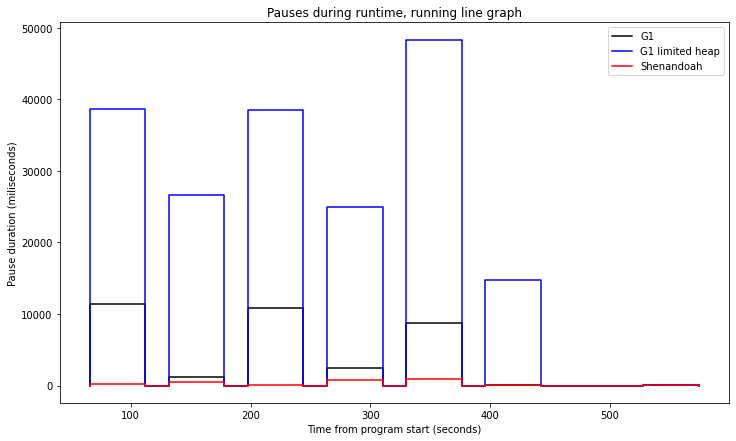

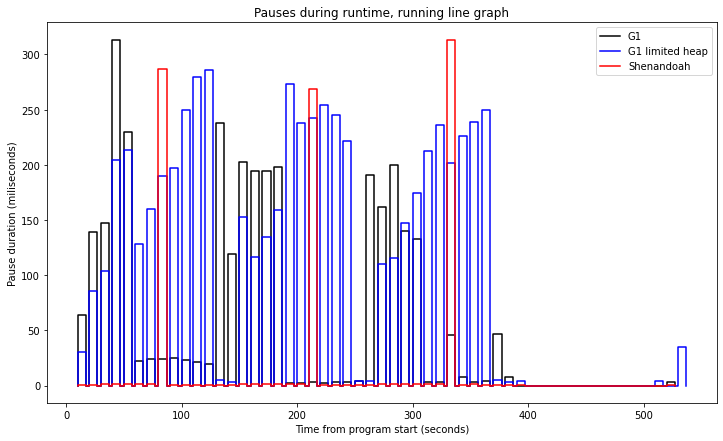

In [102]:
f, axs = plt.subplots()
#timedata, bucketdata = tfrom.get_sum_pauses_n_duration(x1, y1, 10)
_ = uplt.plot_pauses_bar(timedata, bucketdata, axs, "red", "Example with bars")
f, axs = plt.subplots()
_ = uplt.plot_paused_and_running_line(timedata, bucketdata, axs, color, label, True)
timelist, bucketlist = tfrom.compare_sum_pauses_n_buckets(times_seconds, pauses_miliseconds, 8)
_ = uplt.compare_pauses_bar(timelist, bucketlist, None, colors, labels)
_ = uplt.compare_paused_running_line(timelist, bucketlist, None, colors, labels, const_bar_width = True)
timelist, bucketlist = tfrom.compare_max_pauses_n_duration(times_seconds, pauses_miliseconds, 10)
_ = uplt.compare_paused_running_line(timelist, bucketlist, None, colors, labels, const_bar_width = True)


### Show metadata

In [91]:
#uplt.print_metadata([m1, m2, m3], labels, 20)

### Compare heap allocation over time

Shenandoah
Finished!


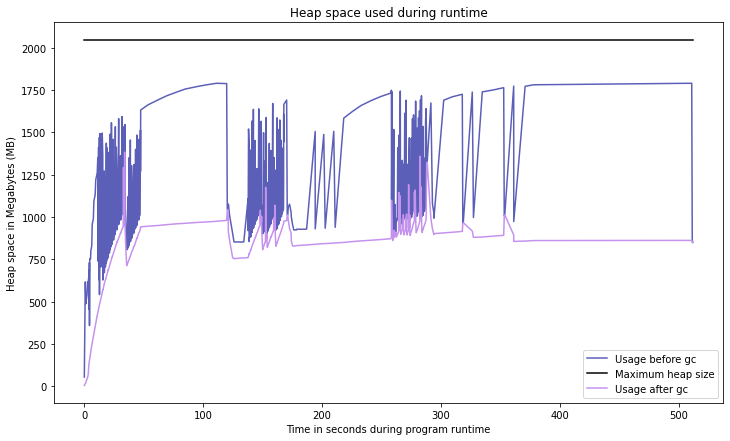

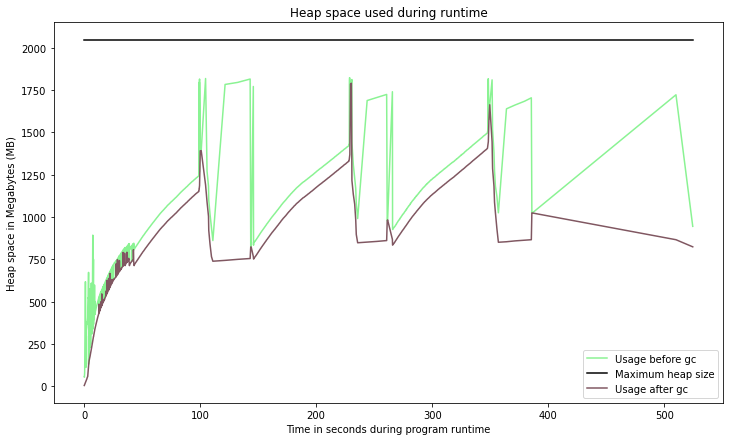

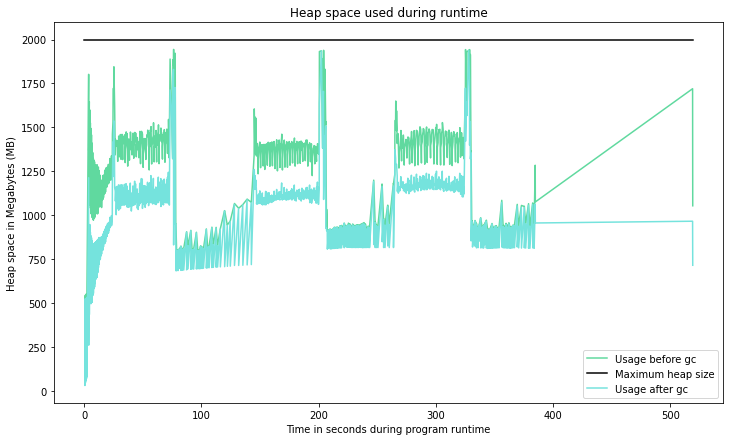

In [92]:
before_gc, after_gc, max_heap, unit, _ = tfrom.get_heap_occupancy(d1)

graph = pha.plot_heap_occupancy(x1, before_gc, unit, 2.048, "G", label = "Usage before gc")
_ = pha.plot_heap_occupancy(x1, after_gc, unit, 2.048, "G", axs = graph, label = "Usage after gc", plot_max=False)
graph = None

before_gc, after_gc, max_heap, unit, _ = tfrom.get_heap_occupancy(d2)
graph = pha.plot_heap_occupancy(x2, before_gc, unit, 2.048, "G", label = "Usage before gc")
_ = pha.plot_heap_occupancy(x2, after_gc, unit, 2.048, "G", axs = graph, label = "Usage after gc", plot_max=False)
graph = None

# Note, the third run uses Shenandoah. TODO: Consider a better system for handling different types of pauses/concurrent marking periods.
run3_concurrent = upl.getConcurrentDurations(path3)
tfrom.setMaxTime(run3_concurrent, maxtime_seconds)
before_gc, after_gc, max_heap, unit, pauses_concurrent = tfrom.get_heap_occupancy(run3_concurrent)
graph = pha.plot_heap_occupancy(pauses_concurrent, before_gc, unit, 2, "G", label = "Usage before gc")
_ = pha.plot_heap_occupancy(pauses_concurrent, after_gc, unit, 2, "G", axs = graph, label = "Usage after gc", plot_max=False)
graph = None


# graph = pha.plot_heap_occupancy_percentage(x1, before_gc, unit, 2.048, "G", label = "Usage before gc")
# graph = pha.plot_heap_occupancy_percentage(x1, after_gc, unit, 2.048, "G", label = "Usage After gc", axs = graph, plot_max = False)
# graph = pha.plot_heap_occupancy_percentage(x1, max_heap, unit, 2.048, "G", label = "Current max heapsize", axs = graph, plot_max = False)
# allo = upl.getHeapAllocation(path1)


#     print(after_gc)
#     after_gc = tfrom.remove_every_other(after_gc, 0)
#     time_sec_half = tfrom.remove_every_other(time_sec, 0)
#     print(after_gc)
#     graph = pha.plot_heap_occupancy_percentage(time_sec_half, after_gc, unit, 16, "G", label = "Shenandoah after GC", axs = None, plot_max = False)
#     graph = pha.plot_heap_occupancy_percentage(time_sec, before_gc, unit, 16, "G", label = "Shenandoah before GC", axs = graph, plot_max = True)
#     _ = pha.plot_heap_occupancy(time_sec_half, after_gc, unit, 16, "G", label = "After GC run Shenandoah", axs = None, plot_max = True)

print("Finished!")

### Compare scatter plot

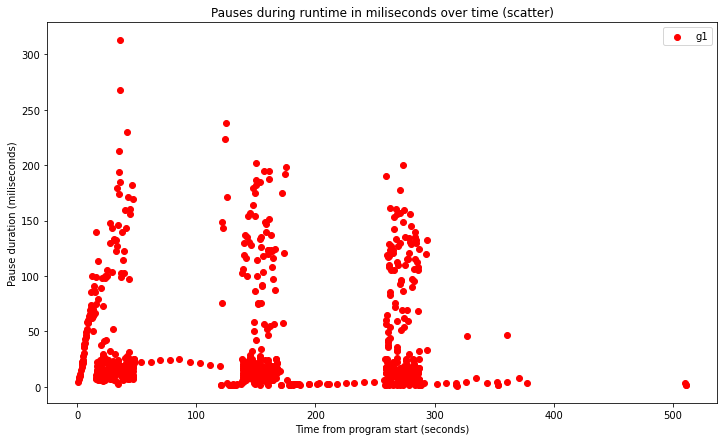

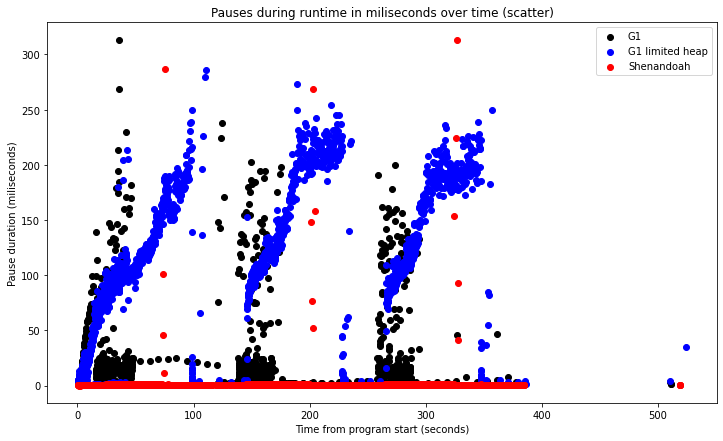

In [93]:
fix, axs = plt.subplots()
uplt.plot_pauses_scatter(x1, y1, axs, "Red", "g1")
_ = uplt.comparrison_scatter(times_seconds, pauses_miliseconds, None, colors, labels)
print("\n")